In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [3]:
connect= sqlite3.connect("la_sales.sqlite")

Extract data from Data sources.


In [5]:
data = r"C:\Users\kelvi\Desktop\webscrapingproject\MachineLearningproject\Spring Skillup\LA_Retail_Sales.csv"

In [9]:
sales_df = pd.read_csv(data)

In [27]:
sales_df.head()

,store_id,store_name,product_category,date,unit_sales,dollar_sales,store_zip,promotion_flag
0,LA002,Store_2,Household,2024-09-01,16.0,96.28,90004,True
1,LA001,Store_1,Beverages,2024-09-01,14.0,86.63,90004,True
2,LA004,Store_4,Produce,2024-09-15,18.0,298.26,90003,True
3,LA003,Store_3,Household,2024-09-07,7.0,25.69,90001,True
4,LA008,Store_8,Beverages,2024-09-18,25.0,85.46,90005,False


In [13]:
sales_df.tail()

,store_id,store_name,product_category,date,Unit sales,DOLLAR SALES,store_zip,promotion_flag
745,LA010,Store_10,Beverages,9/24/24,46.0,790.99,90005,True
746,LA008,Store_8,Snacks,9/14/24,23.0,375.40,90003,False
747,LA004,Store_4,Personal Care,9/14/24,17.0,225.24,900XX,False
748,LA009,Store_9,Snacks,9/28/24,37.0,406.47,90004,False
749,LA010,Store_10,Beverages,9/24/24,34.0,190.80,90003,False


In [15]:
sales_df.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          750 non-null    object 
 1   store_name        750 non-null    object 
 2   product_category  750 non-null    object 
 3   date              750 non-null    object 
 4   Unit sales        745 non-null    float64
 5   DOLLAR SALES      743 non-null    float64
 6   store_zip         750 non-null    object 
 7   promotion_flag    750 non-null    bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 41.9+ KB


In [17]:
sales_df.describe()

,Unit sales,DOLLAR SALES
count,745.000000,743.000000
mean,25.585235,279.496729
std,14.357514,217.190090
min,1.000000,5.330000
25%,13.000000,104.920000
50%,26.000000,224.690000
75%,38.000000,407.095000
max,50.000000,980.000000


In [50]:
import glob

In [31]:
##file_paths = glob.glob("LA_Retail_Sales_By_Day/*.csv",lines = True)
##file_paths, this is meant to combine all the datafiles into one big file.

In [21]:
## reading a json file
file  = r"C:\Users\kelvi\Desktop\webscrapingproject\MachineLearningproject\Spring Skillup\LA_Retail_Sales.json"
sales_df = pd.read_json(file,lines=True)

sales_df.head()
 

,store_id,store_name,product_category,date,unit_sales,dollar_sales,store_zip,promotion_flag
0,LA002,Store_2,Household,2024-09-01,16.0,96.28,90004,True
1,LA001,Store_1,Beverages,2024-09-01,14.0,86.63,90004,True
2,LA004,Store_4,Produce,2024-09-15,18.0,298.26,90003,True
3,LA003,Store_3,Household,2024-09-07,7.0,25.69,90001,True
4,LA008,Store_8,Beverages,2024-09-18,25.0,85.46,90005,False


In [ ]:
import requests
import time
from datetime import datetime



In [35]:
 sales_df = pd.read_csv(data)
sales_df.columns = sales_df.columns.str.lower().str.replace(" ","_")
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          750 non-null    object 
 1   store_name        750 non-null    object 
 2   product_category  750 non-null    object 
 3   date              750 non-null    object 
 4   unit_sales        745 non-null    float64
 5   dollar_sales      743 non-null    float64
 6   store_zip         750 non-null    object 
 7   promotion_flag    750 non-null    bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 41.9+ KB


In [43]:
 # missing indices
missing_indices = sales_df.query("unit_sales.isna()").index
missing_indices
sales_df["unit_sales"]=sales_df["unit_sales"].fillna(0)
 

In [47]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          750 non-null    object 
 1   store_name        750 non-null    object 
 2   product_category  750 non-null    object 
 3   date              750 non-null    object 
 4   unit_sales        750 non-null    float64
 5   dollar_sales      743 non-null    float64
 6   store_zip         750 non-null    object 
 7   promotion_flag    750 non-null    bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 41.9+ KB


In [53]:
sales_df = sales_df.dropna(subset=["unit_sales","dollar_sales"])
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 749
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          743 non-null    object 
 1   store_name        743 non-null    object 
 2   product_category  743 non-null    object 
 3   date              743 non-null    object 
 4   unit_sales        743 non-null    float64
 5   dollar_sales      743 non-null    float64
 6   store_zip         743 non-null    object 
 7   promotion_flag    743 non-null    bool   
dtypes: bool(1), float64(2), object(5)
memory usage: 47.2+ KB


In [59]:
sales_df["Revenue_per_unit"] = (sales_df["dollar_sales"] / sales_df["unit_sales"])
sales_df.head()

,store_id,store_name,product_category,date,unit_sales,dollar_sales,store_zip,promotion_flag,Revenue_per_unit
0,LA002,Store_2,Household,9/1/24,16.0,96.28,90004,True,6.017500
1,LA001,Store_1,Beverages,9/1/24,14.0,86.63,90004,True,6.187857
2,LA004,Store_4,Produce,9/15/24,18.0,298.26,90003,True,16.570000
3,LA003,Store_3,Household,9/7/24,7.0,25.69,90001,True,3.670000
4,LA008,Store_8,Beverages,9/18/24,25.0,85.46,90005,False,3.418400


In [63]:
sales_df["date"] = pd.to_datetime(sales_df["date"],format = 'mixed')
sales_df["promotion_flag"] = sales_df["promotion_flag"].astype(bool)
sales_df["unit_sales"] = sales_df["unit_sales"].astype(int)

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743 entries, 0 to 749
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   store_id          743 non-null    object        
 1   store_name        743 non-null    object        
 2   product_category  743 non-null    object        
 3   date              743 non-null    datetime64[ns]
 4   unit_sales        743 non-null    int32         
 5   dollar_sales      743 non-null    float64       
 6   store_zip         743 non-null    object        
 7   promotion_flag    743 non-null    bool          
 8   Revenue_per_unit  743 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 50.1+ KB


In [65]:
sales_df.describe()

,date,unit_sales,dollar_sales,Revenue_per_unit
count,743,743.000000,743.000000,743.000000
mean,2024-09-15 12:20:20.995962368,25.464334,279.496729,inf
min,2024-09-01 00:00:00,0.000000,5.330000,2.032340
25%,2024-09-08 12:00:00,13.000000,104.920000,6.575342
50%,2024-09-16 00:00:00,25.000000,224.690000,10.861905
75%,2024-09-23 00:00:00,38.000000,407.095000,15.401379
max,2024-09-30 00:00:00,50.000000,980.000000,inf
std,NaN,14.457709,217.190090,NaN


<Axes: ylabel='Frequency'>

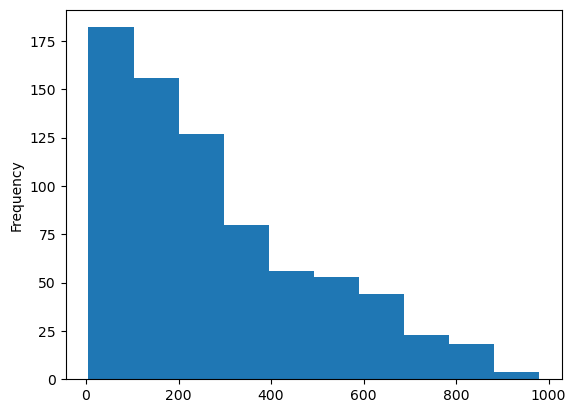

In [67]:
sales_df.dollar_sales.plot.hist()
# sns.histplot(data=sales_df,x = "dollar_sales",kde = True)

In [79]:
weather_df = pd.read_csv("C:\\Users\\kelvi\\Desktop\\webscrapingproject\\MachineLearningproject\\Spring Skillup\\LA_Weather_Data.csv")
weather_df.head()


,date,temp,humidity,weather_main,weather_desc
0,2024-09-01,71.19,81,Clear,clear sky
1,2024-09-15,63.91,82,Clouds,broken clouds
2,2024-09-07,78.37,64,Clouds,few clouds
3,2024-09-18,60.82,78,Clear,clear sky
4,2024-09-23,67.08,88,Clear,clear sky


In [123]:
sales_df.head()

,store_id,store_name,product_category,date,Unit sales,DOLLAR SALES,store_zip,promotion_flag,temp_x,temp_y,temp
0,LA002,Store_2,Household,9/1/24,16.0,96.28,90004,True,NaN,NaN,NaN
1,LA001,Store_1,Beverages,9/1/24,14.0,86.63,90004,True,NaN,NaN,NaN
2,LA004,Store_4,Produce,9/15/24,18.0,298.26,90003,True,NaN,NaN,NaN
3,LA003,Store_3,Household,9/7/24,7.0,25.69,90001,True,NaN,NaN,NaN
4,LA008,Store_8,Beverages,9/18/24,25.0,85.46,90005,False,NaN,NaN,NaN


In [113]:
#merger the two data frames.
#sales_df.merge(weather_df[["date","temp"]], how="left",on="date")
sales_df = pd.read_csv(data)
weather_df = pd.read_csv("C:\\Users\\kelvi\\Desktop\\webscrapingproject\\MachineLearningproject\\Spring Skillup\\LA_Weather_Data.csv")

merged_data = [sales_df,weather_df]
Merged_data = pd.concat(merged_data)
Merged_data.head()

,store_id,store_name,product_category,date,Unit sales,DOLLAR SALES,store_zip,promotion_flag,temp,humidity,weather_main,weather_desc
0,LA002,Store_2,Household,9/1/24,16.0,96.28,90004,True,NaN,NaN,NaN,NaN
1,LA001,Store_1,Beverages,9/1/24,14.0,86.63,90004,True,NaN,NaN,NaN,NaN
2,LA004,Store_4,Produce,9/15/24,18.0,298.26,90003,True,NaN,NaN,NaN,NaN
3,LA003,Store_3,Household,9/7/24,7.0,25.69,90001,True,NaN,NaN,NaN,NaN
4,LA008,Store_8,Beverages,9/18/24,25.0,85.46,90005,False,NaN,NaN,NaN,NaN


In [121]:
sales_df = sales_df.merge(weather_df[["date","temp"]], how="left",on="date")
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          750 non-null    object 
 1   store_name        750 non-null    object 
 2   product_category  750 non-null    object 
 3   date              750 non-null    object 
 4   Unit sales        745 non-null    float64
 5   DOLLAR SALES      743 non-null    float64
 6   store_zip         750 non-null    object 
 7   promotion_flag    750 non-null    bool   
 8   temp_x            0 non-null      float64
 9   temp_y            0 non-null      float64
 10  temp              0 non-null      float64
dtypes: bool(1), float64(5), object(5)
memory usage: 59.5+ KB


In [125]:
sales_df

,store_id,store_name,product_category,date,Unit sales,DOLLAR SALES,store_zip,promotion_flag,temp_x,temp_y,temp
0,LA002,Store_2,Household,9/1/24,16.0,96.28,90004,True,NaN,NaN,NaN
1,LA001,Store_1,Beverages,9/1/24,14.0,86.63,90004,True,NaN,NaN,NaN
2,LA004,Store_4,Produce,9/15/24,18.0,298.26,90003,True,NaN,NaN,NaN
3,LA003,Store_3,Household,9/7/24,7.0,25.69,90001,True,NaN,NaN,NaN
4,LA008,Store_8,Beverages,9/18/24,25.0,85.46,90005,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
745,LA010,Store_10,Beverages,9/24/24,46.0,790.99,90005,True,NaN,NaN,NaN
746,LA008,Store_8,Snacks,9/14/24,23.0,375.40,90003,False,NaN,NaN,NaN
747,LA004,Store_4,Personal Care,9/14/24,17.0,225.24,900XX,False,NaN,NaN,NaN
748,LA009,Store_9,Snacks,9/28/24,37.0,406.47,90004,False,NaN,NaN,NaN


In [131]:
#loadinto SQL

sales_df.to_sql("Sales",if_exists="replace",index=False,con=connect)

750

In [133]:
pd.read_sql("select * from Sales where temp>70", con=connect)

,store_id,store_name,product_category,date,Unit sales,DOLLAR SALES,store_zip,promotion_flag,temp_x,temp_y,temp
